
# Project: No-show appointments analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
 <li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
 <li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Data Description

>This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each rows. The rest of data descriptions about the features can be found <a href="https://www.kaggle.com/joniarroba/noshowappointments">here</a>.
### Questions to ponder:
<ul>
    <li><a href="#Q1">Question 1: Percentage of people who showed up VS the ones who did not.</a></li>
    <li><a href="#Q2">Question 2: Where do most people book their appointments?</a></li>
    <li><a href="#Q3">Question 3: Does receiving SMS alert have effect on people showing up?</a></li>
    <li><a href="#Q4">Question 4: Does having scholarship have effect on people showing up?</a></li>
    <li><a href="#Q5">Question 5: Which gender is most likely to show up for their appointments?</a></li>
    <li><a href="#Q6">Question 6: How does increase waiting time after the appointment has been scheduled affect showing up?</a></li>
    <li><a href="#Q7">Question 7: How does increase in age vary with appointment show up?</a></li>
</ul>

In [1]:
"Importing packages that are going to be used"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set() 

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we will load in the data and explore the data by checking for data types, any nulls or or duplicates also check if there is any rows that need to be dropped.

### General Properties

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head() #view the first 5 rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info() #check for any nulls and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>
<ul>
    <li> May need to convert the columns names to lower cases</li>
    <li> <b>PatientId</b> and <b>AppoinmentID</b> won't help in our analysis can be drooped</li>
    <li> Change the data types of <b>ScheduleDay</b> and <b>AppointmentDay</b> to datetime</li>
    <li> Encode the <b>No-show</b> </li>
    <li> The dataset contains no nulls</li>
</ul>

In [4]:
sum(df.duplicated())

0

>No duplicates in our dataset

In [5]:
df.describe() #check statistical characters

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>
<ul> 
    <li> The <b>Age</b> column need to be handle we can't have a "negative age"</li>
</ul>

In [6]:
df.nunique() #number of unique values for each feature

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>The **Handcap** column has many unique values that need to be handled.

<a id='clean'></a>
## Data Cleaning
> In this section, we perform some operations on our dataset based on the previous findings to make our analysis more accurate and clear.

In [7]:
to_be_dropped = pd.Series(['PatientId', 'AppointmentID'])
df.drop(to_be_dropped, axis = 1, inplace = True) #dropping the columns mentioned previously
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [8]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), 
          inplace=True) #turning the columns into lower cases and replacing "-" in the 'no-show' column
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [9]:
df.query('age==age<0') #check for value of age that is less than one.

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.drop(df.index[99832],inplace = True) #drop the row
df.query('age==age<0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [11]:
df['no_show'] = df['no_show'].apply(lambda x: 0 if x == 'No' else 1) #encoding the 'no_show' column
df.no_show.value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

In [12]:
df['handcap'] = df['handcap'].apply(lambda x: 0 if x == 0 else 1) #any handcap value above 1 assign it one
df['handcap'].value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

In [13]:
# Making the data type of ScheduledDay & AppointmentDay => DateTime data type.
def func(df):
    date = ['scheduledday','appointmentday']
    for i in date:
        df[i] = pd.to_datetime(df[i])
func(df)
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                         int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### Getting the overview of the distributions of some of the variables

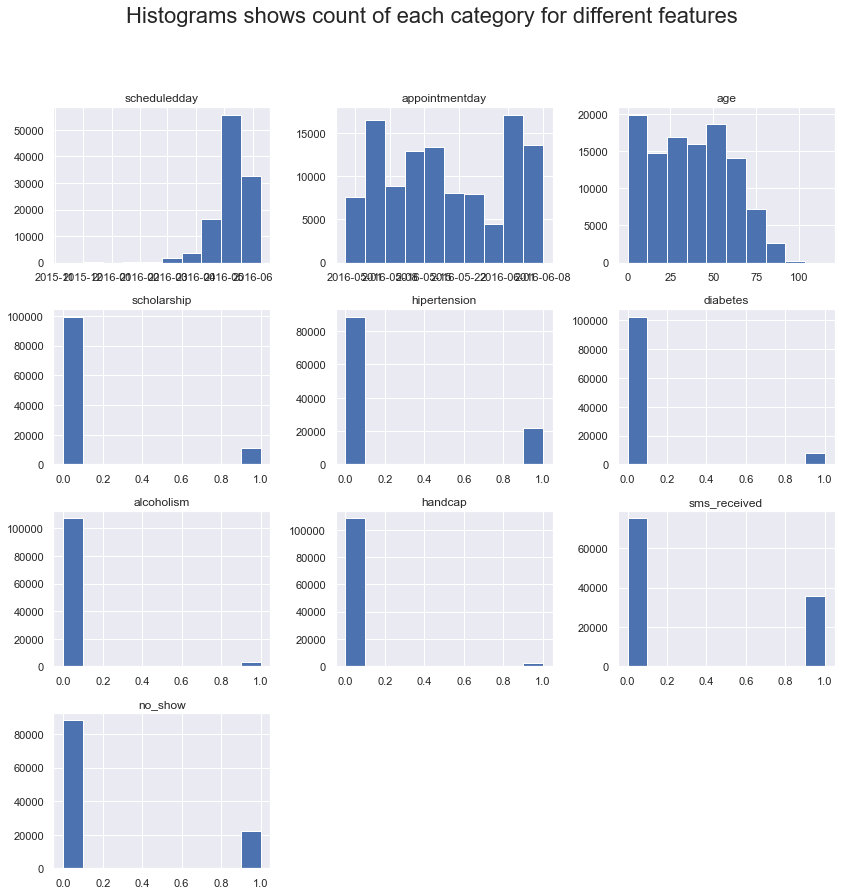

In [14]:
df.hist(figsize=(14,14));
plt.suptitle('Histograms shows count of each category for different features', fontsize=22);

> There seems to be more patients not showing up for appointments. Most young people appear to be patients. More depth analysis will be taken to see whether this and other variables could be the cause of the showing or not showing up.

<a id='Q1'></a>
### Question 1: Percentage of people who showed up VS the ones who did not.

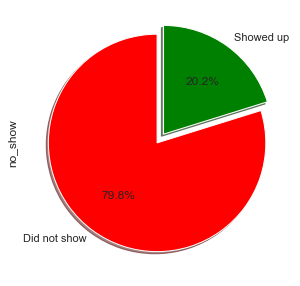

In [15]:
df.groupby('no_show')['no_show'].count().plot(figsize=(5,5),
                                              labels=['Did not show','Showed up'],
                                              kind='pie',
                                              autopct='%1.1f%%', 
                                              startangle=90,
                                              shadow=True,
                                              colors=['red','green'],
                                             explode=(0, 0.1));

> $\approx$ 80% of patients are not showing up for their appointments.

<a id='Q2'></a>
### Question 2: Where do most people go for their appointments?

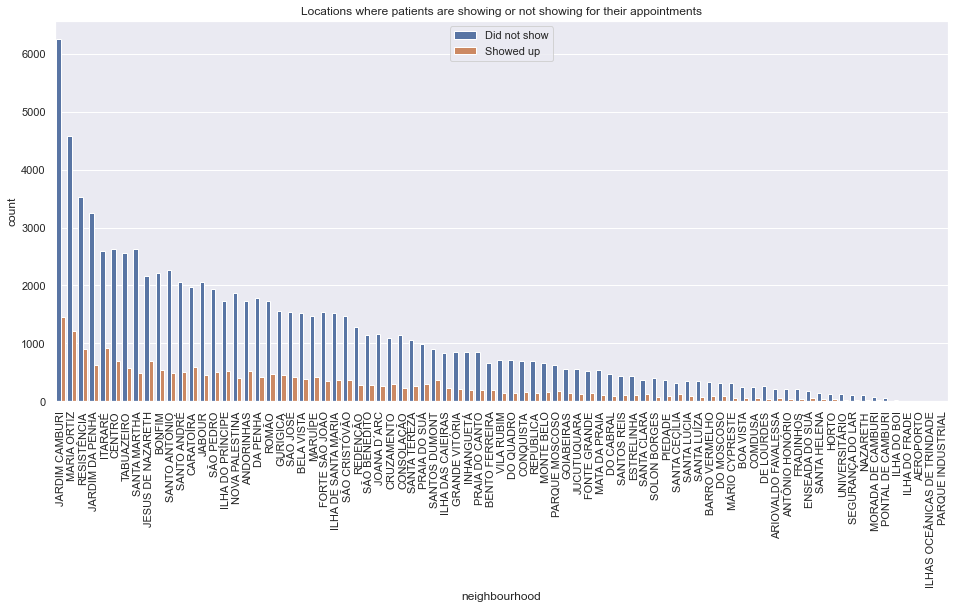

In [16]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
ax = sns.countplot(x=df["neighbourhood"] , hue = df["no_show"] , order =df["neighbourhood"].value_counts().index)
ax.set_title("Locations where patients are showing or not showing for their appointments")
plt.legend(['Did not show','Showed up']);

>Overall patients seems to be not showing up at these loactions with JARDIM  CAMBURI being the most booked location.

<a id='Q3'></a>
### Question 3: Does receiving SMS alert have effect on people showing up?

0    67.897146
1    32.102854
Name: sms_received, dtype: float64

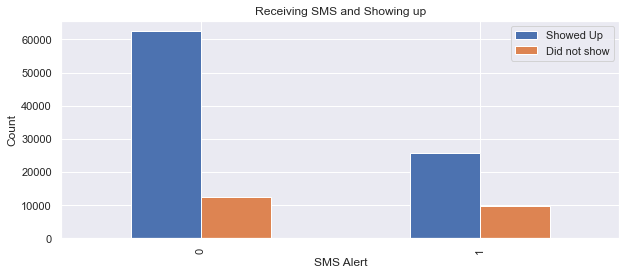

In [17]:
df.groupby('sms_received')['no_show'].value_counts().unstack().plot(kind = 'bar', figsize = (10,4))
plt.title("Receiving SMS and Showing up")
plt.legend(['Showed Up','Did not show'])
plt.ylabel("Count")
plt.xlabel("SMS Alert")
(df['sms_received'].value_counts()/len(df))*100

> Receiving an SMS did not really determine a person showing up as more people who did not receive the SMS still showed up.

<a id='Q4'></a>
### Question 4: Does having scholarship have effect on people showing up?

0    90.173353
1     9.826647
Name: scholarship, dtype: float64

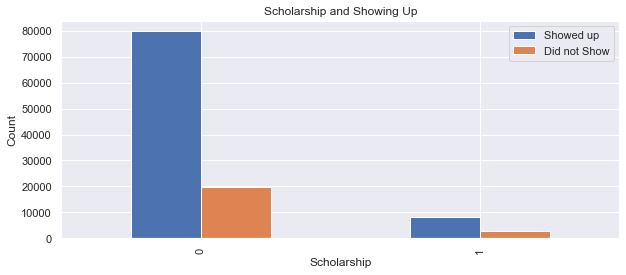

In [18]:
df.groupby('scholarship')['no_show'].value_counts().unstack().plot(kind = 'bar', figsize = (10,4))
plt.title("Scholarship and Showing Up")
plt.legend(['Showed up','Did not Show'])
plt.ylabel("Count")
plt.xlabel("Scholarship")
(df['scholarship'].value_counts()/len(df))*100

> Most people were not under Bolsa Família social welfare but they did end up showing for their appointment. This shows that lack of scholarship does not really determine whether a person see a doctor or not (not implying causation).

<a id='Q5'></a>
### Question 5: Which gender is most likely to show up for their appointment?

F    64.997376
M    35.002624
Name: gender, dtype: float64

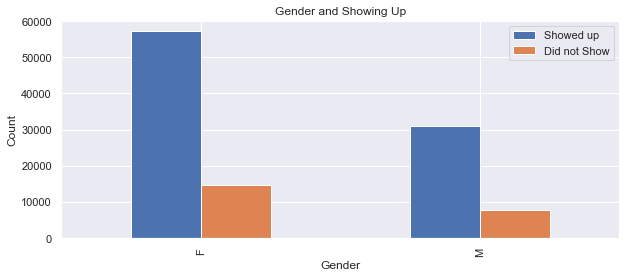

In [19]:
df.groupby('gender')['no_show'].value_counts().unstack().plot(kind = 'bar', figsize = (10,4));
plt.title("Gender and Showing Up")
plt.legend(['Showed up','Did not Show'])
plt.ylabel("Count")
plt.xlabel("Gender")
(df['gender'].value_counts()/len(df))*100

> The graph indicates that more females tend to show up for the appointments but of course this could be attributed to high percentage of females in the dataset.

<a id='Q6'></a>
### Question 6: How does waiting after the appointment has been scheduled affect showing up?

In [20]:
#since the time is given in both days and hours we just gonna use the days to check the difference
df['waiting_time'] = df['appointmentday'].dt.date - df['scheduledday'].dt.date 
df['waiting_time'] = df['waiting_time'].dt.days # extracting days part of the datetime
df.drop(['appointmentday', 'scheduledday'], axis = 1, inplace = True)
df.drop(df[df['waiting_time'] < 0].index, inplace = True) 

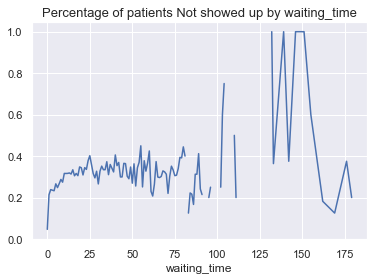

In [21]:
#calculating ratio of waiting time when appointments were adhered to
ratio_waiting = df[df.no_show == 1].groupby(['waiting_time']).size()/df.groupby(['waiting_time']).size() 
ratio_waiting.plot()
plt.title('Percentage of patients Not showed up by waiting_time', size='13');

> As number of waiting days for someone's appointment day increases they are more relunctant in showing up.

<a id='Q7'></a>
### Question 7: Which age group mostly show up for their appointment?

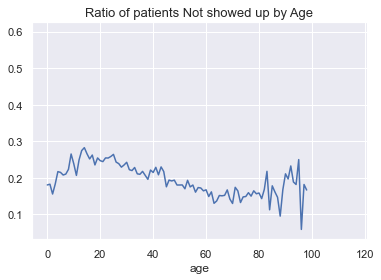

In [22]:
#calculating age ratio of patients that showed for their appointments.
ratio_age = df[df.no_show == 1].groupby(['age']).size()/df.groupby(['age']).size()
ratio_age.plot()
plt.title('Ratio of patients Not showed up by Age', size='13');

>This shows that the people in their younger age seems to be relucatant in showing appointment than older people as shown by slightly high ratio.

<a id='conclusions'></a>
## Conclusions

<ul>
    <li> As waiting time increase, the chance to miss the appointments increases </li>
    <li> Patients who didn't receive the SMS showed up more than those who received it. </li>
    <li> Patients who didn't enroll in the Bolsa Família social welfare showed up more than those who enrolled in it. </li>
    <li> People in their middle age to old age tend to show up more for their appointment. </li>
    <li> Females do show up on their appointments more often than males do, but this can be attributed by the proportion of females in the dataset.
</ul>

## Limitations
<ul>
    <li> Age feature could have outliers which was did handled. </li>
    <li> Gender feature could be bias because there is more females than males. </li>
    <li> The gathering of data should be given more attention as some patient had their appointment day before scheduling day. Of course we droped those values but one can ask if this could affect our overall analysis </li>
</ul>

#### Logistic Regression from Sklearn can be used as a model to check for accuracy and precision of this analysis

<a id='ref'></a>
## References
<a href="https://matplotlib.org/"> Matplotlib</a>
<a href="https://www.w3schools.com/python/numpy/numpy_intro.asp"> Numpy</a>
<a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">Seaborn</a>
<a href="https://pandas.pydata.org/">Pandas</a>
<a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia#">Scholarship</a>